# Predicting Flight Status with Naive Bayes, Decision Trees and Logistic Regression

Mariana Betancourt, Sandra Maldonado Barbosa, Bryan Meriel and Steven Kinnunen

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import dmba
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterGrid,GridSearchCV

# Loading and Preprocessing Data

Reading source file into a pandas dataframe.

In [3]:
flight_df = pd.read_csv("FlightDelays.csv")

Checking the first 5 records of the dataframe.

In [4]:
flight_df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,37987,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,2004-01-01,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,2004-01-01,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,2004-01-01,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,2004-01-01,7792,IAD,0,4,1,N698BR,ontime


Getting the number of records.

In [5]:
print(len(flight_df))

2201


We start out wth 2201 rows. First, we will check the unique values of each column to detect any obvious outliers.

In [6]:
flight_df['CRS_DEP_TIME'].unique()

array([1455, 1640, 1245, 1715, 1039,  840, 1240, 1645, 2120,  930, 1230,
       1430, 1730, 2030, 1530,  600, 1830,  900, 1300, 1400, 1500, 1900,
        850, 1100, 1700, 2100, 1720, 1030,  700, 1710, 1525, 1515, 1630,
        640, 1610,  759,  630,  830, 1725, 1600,  730, 1000, 1200, 1800,
       2000, 1315, 1605, 1130, 1330, 1930,  800,  735, 1359,  645, 1040,
        925, 2130,  845, 1520], dtype=int64)

In [7]:
flight_df['CARRIER'].unique()

array(['OH', 'DH', 'DL', 'MQ', 'UA', 'US', 'RU', 'CO'], dtype=object)

In [8]:
flight_df['DEP_TIME'].unique()

array([1455, 1640, 1245, 1709, 1035,  839, 1243, 1644, 1710, 2129, 2114,
       1458,  932, 1228, 1429, 1728, 2029, 1525,  556, 1822,  853, 1254,
       1356, 1452, 1853,  841,  858, 1056, 1253, 1655, 2055, 1030,  656,
       1256, 1726,  840, 1704, 2118, 1651, 1850, 1521, 1855, 1357, 1508,
       1255, 1625, 1641, 1249, 1531, 1712,  645, 1236,  859, 1232, 1645,
       1716, 2305, 1605,  930, 1230, 1427, 1730, 2028, 1522,  552, 1847,
        852, 1053, 1258, 1402, 1456,  850,  657,  857, 1058, 2056, 1715,
       1727, 1301,  754,  837, 1350, 1512,  629,  655, 1650, 1856,  854,
       1858, 2050, 1358, 1510, 1519, 1738,  640,  855, 1237, 1654, 1741,
       2213, 1604, 2138, 1505,  828, 1428, 1629, 1829, 2024, 1600,  555,
        849, 1059, 1500, 1658, 1857, 1714, 1026, 1448, 1705, 1329, 2126,
        625, 1722,  658,  941, 1556, 1511,  703, 1535, 1837, 1032,  900,
       1504, 1642, 2120, 1607, 2116, 1028, 1432, 1832, 2030, 1534,  554,
        745, 1257, 1659, 1936,  954, 1055, 1158, 13

In [9]:
flight_df['DEST'].unique()

array(['JFK', 'LGA', 'EWR'], dtype=object)

In [10]:
flight_df['DISTANCE'].unique()

array([184, 213, 229, 228, 214, 169, 199], dtype=int64)

In [11]:
flight_df['FL_DATE'].unique()

array(['37987', '2004-01-01', '2004-01-02', '2004-01-03', '2004-01-04',
       '2004-01-05', '2004-01-06', '2004-01-07', '2004-01-08',
       '2004-01-09', '2004-01-10', '2004-01-11', '2004-01-12',
       '2004-01-13', '2004-01-14', '2004-01-15', '2004-01-16',
       '2004-01-17', '2004-01-18', '2004-01-19', '2004-01-20',
       '2004-01-21', '2004-01-22', '2004-01-23', '2004-01-24',
       '2004-01-25', '2004-01-26', '2004-01-27', '2004-01-28',
       '2004-01-29', '2004-01-30', '2004-01-31'], dtype=object)

Here, we can see that FL_DATE has at least one value that does not conform to the date format. So we will filter the dataframe for records that are not equal to the non-conforming value.

In [12]:
flight_df = flight_df[flight_df['FL_DATE'] != '37987']

In [13]:
flight_df['FL_DATE'].unique()

array(['2004-01-01', '2004-01-02', '2004-01-03', '2004-01-04',
       '2004-01-05', '2004-01-06', '2004-01-07', '2004-01-08',
       '2004-01-09', '2004-01-10', '2004-01-11', '2004-01-12',
       '2004-01-13', '2004-01-14', '2004-01-15', '2004-01-16',
       '2004-01-17', '2004-01-18', '2004-01-19', '2004-01-20',
       '2004-01-21', '2004-01-22', '2004-01-23', '2004-01-24',
       '2004-01-25', '2004-01-26', '2004-01-27', '2004-01-28',
       '2004-01-29', '2004-01-30', '2004-01-31'], dtype=object)

In [14]:
print(len(flight_df))

2200


Now all the unique values conform to the same format and we only lost one record to do so. We can now convert the column type to date.

In [15]:
flight_df['FL_DATE'] = pd.to_datetime(flight_df['FL_DATE'])

In [16]:
flight_df['FL_DATE'].head()

1   2004-01-01
2   2004-01-01
3   2004-01-01
4   2004-01-01
5   2004-01-01
Name: FL_DATE, dtype: datetime64[ns]

In [17]:
flight_df['FL_NUM'].unique()

array([6155, 7208, 7215, 7792, 7800, 7806, 7810, 7812, 7814, 7924,  746,
       1746, 1752, 1756, 1762, 1768, 4752, 4760, 4784, 4956, 4964, 4966,
       4968, 4976,  846, 2164, 2168, 2172, 2176, 2180, 2188, 2403, 2675,
       2303, 2703,  808,  814, 7299, 7302, 7303, 7304, 2497, 2385, 2261,
       2336, 2216, 2156, 2664, 2181, 5935, 7211, 7790, 7808, 7816, 4960,
       2160, 2184,  806, 7307, 7371, 2855, 2582, 2761, 2692, 3276, 2879,
       1744, 1748, 1760, 1764, 2267, 2097, 4771, 4972, 2166, 2170, 2174,
       2178, 2182, 2186, 2603,  810, 1740, 1742, 1750, 1754, 1766, 4952,
       4954, 4970, 1479, 2162, 1758, 3372,  816, 2367, 7305, 7684, 7818,
       2229, 2361, 1767, 2254], dtype=int64)

In [18]:
flight_df['ORIGIN'].unique()

array(['DCA', 'IAD', 'BWI'], dtype=object)

In [19]:
flight_df['Weather'].unique()

array([0, 1], dtype=int64)

In [20]:
flight_df['DAY_WEEK'].unique()

array([4, 5, 6, 7, 1, 2, 3], dtype=int64)

In [21]:
flight_df['DAY_OF_MONTH'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [22]:
flight_df['TAIL_NUM'].unique()

array(['N405FJ', 'N695BR', 'N662BR', 'N698BR', 'N687BR', 'N321UE',
       'N301UE', 'N328UE', 'N685BR', 'N645BR', 'N918DE', 'N242DL',
       'N241DL', 'N709MQ', 'N717MQ', 'N707MQ', 'N737MQ', 'N726MQ',
       'N724MQ', 'N513UA', 'N709UW', 'N748UW', 'N14916', 'N16954',
       'N26549', 'N18611', 'N19357', 'N691BR', 'N697BR', 'N699BR',
       'N12540', 'N16149', 'N12564', 'N21537', 'N15983', 'N12519',
       'N19966', 'N995CA', 'N415FJ', 'N688BR', 'N665BR', 'N639BR',
       'N686BR', 'N332UE', 'N324UE', 'N305UE', 'N322UE', 'N657BR',
       'N315UE', 'N709BR', 'N964DL', 'N225DL', 'N720MQ', 'N736MQ',
       'N727MQ', 'N713MQ', 'N708MQ', 'N718MQ', 'N556UA', 'N710UW',
       'N736UW', 'N16961', 'N12946', 'N14342', 'N14664', 'N11641',
       'N679BR', 'N309UE', 'N312UE', 'N14977', 'N13990', 'N14907',
       'N13997', 'N12528', 'N11107', 'N14505', 'N16151', 'N15985',
       'N17108', 'N13118', 'N15574', 'N696BR', 'N327UE', 'N311UE',
       'N655BR', 'N329UE', 'N997DL', 'N734MQ', 'N712MQ', 'N739

In [23]:
flight_df['Flight Status'].unique()

array(['ontime', 'delayed'], dtype=object)

Based on our research, we have determined that TAIL_NUM, corresponding to the tail number can be dropped since it is merely a unique identifier and not a meaningful category or numeric value that measures a quantity. Similarly, flight numbers (FL_NUM) are unique identifiers for specific trips and do not represent meaningful categories or measurable quantities. CRS departure times (CRS_DEP_TIME) appear to correspond to scheduled rather than actual departure times. Moreover, the flight date (FL_DATE) column is redundant since all records take place in the same month. Since a day of the month column already exists, we will drop the date column. Since there is another column with actual departure times (DEP_TIME), this column is redundant and will also be removed.

Sources: https://www.indianeagle.com/traveldiary/how-to-find-flight-number/, 
         https://www.stat.purdue.edu/~lfindsen/stat350/airline2008_dataset_definition.pdf
         

In [24]:
flight_df_clean = flight_df.drop(columns=['CRS_DEP_TIME', 'FL_NUM', 'TAIL_NUM', 'FL_DATE'])

In [25]:
flight_df_clean.head()

,CARRIER,DEP_TIME,DEST,DISTANCE,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status
1,DH,1640,JFK,213,DCA,0,4,1,ontime
2,DH,1245,LGA,229,IAD,0,4,1,ontime
3,DH,1709,LGA,229,IAD,0,4,1,ontime
4,DH,1035,LGA,229,IAD,0,4,1,ontime
5,DH,839,JFK,228,IAD,0,4,1,ontime


Now we will export a copy of the data before applying additional transformations.

In [26]:
flight_df_clean.to_csv('FlightDelaysTrainingData.csv')

# Data Exploration with Pivot Tables

Here we create a pivot table to show average distance by carrier and flight origin.

In [27]:
average_distance_by_carrier_origin = pd.pivot_table(flight_df_clean, values = 'DISTANCE', #specifies numeric values
                                              index='CARRIER', # aggregates values by row
                                              columns ='ORIGIN', # aggregates values by column
                                              aggfunc=np.mean, # apply aggregation function
                                              fill_value=0)

Now we display the pivot table.

In [28]:
average_distance_by_carrier_origin

ORIGIN,BWI,DCA,IAD
CARRIER,,,
CO,0,199.000000,0.000000
DH,0,213.000000,223.627863
DL,0,213.920103,0.000000
MQ,0,213.691525,0.000000
OH,184,0.000000,0.000000
RU,169,199.000000,213.000000
UA,0,0.000000,229.000000
US,0,214.000000,0.000000


We create a csv file called "FlightDelaysDataExploration" to store the results of our pivot tables. The first line creates the file, while the second line ensures we write a title for the pivot table with some spaces for clarity. The last line appends the actual pivot table to the csv file.  

*Please note that you should not have the file with the same name open when attempting to write or append to that file.*

In [29]:
with open('FlightDelaysDataExploration.csv', 'w') as f:
    f.write('\nAverage Distance By Carrier and Origin\n\n')
average_distance_by_carrier_origin.to_csv("FlightDelaysDataExploration.csv", mode='a')

Pivot table for average distance by flight status.

In [30]:
average_distance_by_status = pd.pivot_table(flight_df_clean, values = 'DISTANCE', 
                                              index='Flight Status',
                                              aggfunc=np.mean,
                                              fill_value=0)

Displaying the result.

In [31]:
average_distance_by_status

,DISTANCE
Flight Status,
delayed,211.362150
ontime,212.010158


Appending a title and the pivot table itself to the data exploration file.

In [32]:
with open('FlightDelaysDataExploration.csv', 'a') as f:
    f.write('\nAverage Distance By Status\n\n')
average_distance_by_status.to_csv("FlightDelaysDataExploration.csv", mode='a')

Creating a pivot table for the total distance by carrier and flight status.

In [33]:
sum_distance_carrier_status = pd.pivot_table(flight_df_clean, values = 'DISTANCE', 
                                              index='CARRIER',
                                              columns='Flight Status',
                                              aggfunc=np.sum,
                                              fill_value=0)

Displaying the result.

In [34]:
sum_distance_carrier_status

Flight Status,delayed,ontime
CARRIER,,
CO,5174,13532
DH,30597,92335
DL,10043,72958
MQ,17100,45939
OH,736,4600
RU,18178,61398
UA,1145,5954
US,7490,78966


Appending a title and the pivot table to the data exploration file.

In [35]:
with open('FlightDelaysDataExploration.csv', 'a') as f:
    f.write('\nTotal Distance By Carrier and Status\n\n')
sum_distance_carrier_status.to_csv("FlightDelaysDataExploration.csv", mode='a')

Creating a pivot table for the median time by carrier and flight status.

In [36]:
median_time_carrier_status = pd.pivot_table(flight_df_clean, values = 'DEP_TIME', 
                                              index='CARRIER',
                                              columns='Flight Status',
                                              aggfunc=np.median,
                                              fill_value=0)

Displaying the result.

In [37]:
median_time_carrier_status

Flight Status,delayed,ontime
CARRIER,,
CO,1813.0,1256
DH,1608.0,1455
DL,1511.0,1428
MQ,1602.0,1313
OH,1607.5,1455
RU,1556.0,1381
UA,955.0,848
US,1555.0,1300


Appending the title and pivot table to the data exploration file.

In [38]:
with open('FlightDelaysDataExploration.csv', 'a') as f:
    f.write('\nMedian Time By Carrier and Flight Status\n\n')
median_time_carrier_status.to_csv("FlightDelaysDataExploration.csv", mode='a')

Ordinarily, we would convert the departure time to a datetime format. However, we intend to bin all integer values to ensure that the Naive Bayes algorithm will work. Therefore, this would be redundant. With respect to the distance column, since there are only 7 unique values, we can simply convert the integers to categorical values. However, the departure times are too varied to retain each unique value as categorical so we will bin the values. We will additionally bin DAY_OF_MONTH as well.

Changing the data types of distance, weather and day of week to categorical.

In [39]:
flight_df_clean['DISTANCE'] = flight_df_clean['DISTANCE'].astype("category")

In [40]:
flight_df_clean['Weather'] = flight_df_clean['Weather'].astype("category")

In [41]:
flight_df_clean['DAY_WEEK'] = flight_df_clean['DAY_WEEK'].astype("category")

Setting bins for departure time.

In [42]:
bins = [0, 600, 1200, 1800, 2400]
labels = ['Early Morning', 'Morning', 'Afternoon', 'Evening']

Applying bins to dataset.

In [43]:
flight_df_clean['Departure_Time_Interval'] = pd.cut(x = flight_df_clean['DEP_TIME'], bins = bins, labels = labels, include_lowest = True)

Setting bins for days of the month.

In [44]:
bins = [1, 7, 14, 21, 31]
labels = ['1 to 7', '8 to 14', '16 to 21', '22 onwards']

Applying bins to the dataset.

In [45]:
flight_df_clean['Days_of_Month'] = pd.cut(x = flight_df_clean['DAY_OF_MONTH'], bins = bins, labels = labels, include_lowest = True)

Checking the dataset to ensure the transformations were applied.

In [46]:
flight_df_clean.head()

,CARRIER,DEP_TIME,DEST,DISTANCE,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status,Departure_Time_Interval,Days_of_Month
1,DH,1640,JFK,213,DCA,0,4,1,ontime,Afternoon,1 to 7
2,DH,1245,LGA,229,IAD,0,4,1,ontime,Afternoon,1 to 7
3,DH,1709,LGA,229,IAD,0,4,1,ontime,Afternoon,1 to 7
4,DH,1035,LGA,229,IAD,0,4,1,ontime,Morning,1 to 7
5,DH,839,JFK,228,IAD,0,4,1,ontime,Morning,1 to 7


Now that we have categorical versions of departure time and day of the month, we can drop the original columns.

In [47]:
flight_df_clean = flight_df_clean.drop(columns=['DEP_TIME', 'DAY_OF_MONTH'])

In [48]:
flight_df_clean.head()

,CARRIER,DEST,DISTANCE,ORIGIN,Weather,DAY_WEEK,Flight Status,Departure_Time_Interval,Days_of_Month
1,DH,JFK,213,DCA,0,4,ontime,Afternoon,1 to 7
2,DH,LGA,229,IAD,0,4,ontime,Afternoon,1 to 7
3,DH,LGA,229,IAD,0,4,ontime,Afternoon,1 to 7
4,DH,LGA,229,IAD,0,4,ontime,Morning,1 to 7
5,DH,JFK,228,IAD,0,4,ontime,Morning,1 to 7


# Dealing with Class Imbalance

<AxesSubplot:xlabel='Flight Status', ylabel='Count'>

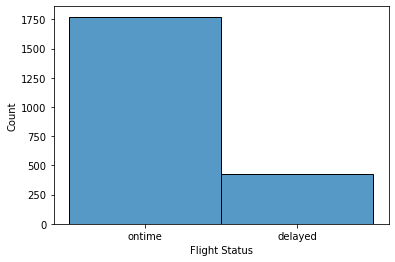

In [49]:
sns.histplot(data = flight_df_clean, x = "Flight Status")

Here we can see that there is a class imbalance issue with our target variable, flight status. There are significantly more ontime records than delayed records. To prevent the dominance of the ontime records in our models, we will oversample from the delayed records to balance the dataset. Then we will proceed by evaluating models for both the unbalanced and balanced data to get the best model.

In [50]:
y = flight_df_clean['Flight Status']
X = flight_df_clean.drop(columns = ['Flight Status'])

We apply the RandomOverSampler to the minority class (delayed) and check for class balance.

In [51]:
over_sample = RandomOverSampler(sampling_strategy  = 'all')
X_over, y_over = over_sample.fit_resample(X, y)
y_values = pd.Series(y_over)
y_values.value_counts()

ontime     1772
delayed    1772
Name: Flight Status, dtype: int64

In [52]:
X_over.head()

,CARRIER,DEST,DISTANCE,ORIGIN,Weather,DAY_WEEK,Departure_Time_Interval,Days_of_Month
0,DH,JFK,213,DCA,0,4,Afternoon,1 to 7
1,DH,LGA,229,IAD,0,4,Afternoon,1 to 7
2,DH,LGA,229,IAD,0,4,Afternoon,1 to 7
3,DH,LGA,229,IAD,0,4,Morning,1 to 7
4,DH,JFK,228,IAD,0,4,Morning,1 to 7


In [53]:
y_values.head()

0    ontime
1    ontime
2    ontime
3    ontime
4    ontime
Name: Flight Status, dtype: object

In [54]:
X_over = pd.get_dummies(X_over)

# Splitting the Data into Training, Validation and Test Sets

Now that we have our balanced dataset, we do a train and test split.

In [55]:
train_X_over, Valid_X_over, train_y_over, valid_y_over = train_test_split(X_over, y_over, test_size=0.4, random_state = 42)

We do the same for the original dataset.

In [56]:
train_X, Valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state = 42)

In [57]:
train_X = pd.get_dummies(train_X)
Valid_X = pd.get_dummies(Valid_X)

In [58]:
X.head()

,CARRIER,DEST,DISTANCE,ORIGIN,Weather,DAY_WEEK,Departure_Time_Interval,Days_of_Month
1,DH,JFK,213,DCA,0,4,Afternoon,1 to 7
2,DH,LGA,229,IAD,0,4,Afternoon,1 to 7
3,DH,LGA,229,IAD,0,4,Afternoon,1 to 7
4,DH,LGA,229,IAD,0,4,Morning,1 to 7
5,DH,JFK,228,IAD,0,4,Morning,1 to 7


Finally, we want to create a sample of 5 records to test the models.

In [59]:
X = pd.get_dummies(X)

In [60]:
testing_df = pd.concat([X,y], axis=1)

Here we randomly sample 5 records from the unbalanced dataframe to use as test records. This code will produce 5 random records each time.

In [61]:
testing_sample = testing_df.sample(5, random_state=42)

Exporting a copy of the test sample to a csv file.

In [62]:
testing_sample.to_csv('FlightDelaysTestingData.csv')

Splitting the test data into predictors (x_test) and target variable (y_test).

In [63]:
y_test = testing_sample['Flight Status']
x_test = testing_sample.drop(columns=['Flight Status'])

In [64]:
x_test = pd.get_dummies(x_test)

We will begin with training and evaluating our models for balanced and unbalanced data, starting with Naive Bayes.

# Naive Bayes - Balanced Data

Train the model.

In [65]:
X_over_nb = MultinomialNB(alpha=0.01) 
X_over_nb.fit(train_X_over, train_y_over)

MultinomialNB(alpha=0.01)

Predict the probabilities.

In [66]:
predProb_train = X_over_nb.predict_proba(train_X_over) 
predProb_valid = X_over_nb.predict_proba(Valid_X_over)

Predict class membership (show class instead of probability by selecting the class with the highest probability)

In [67]:
y_valid_pred = X_over_nb.predict(Valid_X_over)
y_train_pred = X_over_nb.predict(train_X_over)

Use the model to predict a new datapoint.

In [68]:
Valid_X_over.head()

,CARRIER_CO,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,DEST_EWR,DEST_JFK,...,DAY_WEEK_6,DAY_WEEK_7,Departure_Time_Interval_Early Morning,Departure_Time_Interval_Morning,Departure_Time_Interval_Afternoon,Departure_Time_Interval_Evening,Days_of_Month_1 to 7,Days_of_Month_8 to 14,Days_of_Month_16 to 21,Days_of_Month_22 onwards
2210,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
279,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1490,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3321,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2196,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1


In [69]:
df = pd.concat([pd.DataFrame({'actual': valid_y_over, 'predicted': y_valid_pred})], axis=1)
mask = ((Valid_X_over.CARRIER_MQ == 1) & (Valid_X_over.DAY_WEEK_6 == 1) & (Valid_X_over.Departure_Time_Interval_Morning == 0) & (Valid_X_over.DEST_LGA == 1) & (Valid_X_over.ORIGIN_DCA == 1)) 

print(df[mask])

     actual predicted
135  ontime    ontime


# Naive Bayes - Unbalanced Data

Train the model.

In [70]:
X_nb = MultinomialNB(alpha=0.01) 
X_nb.fit(train_X, train_y)

MultinomialNB(alpha=0.01)

Predict the probabilities.

In [71]:
predProb_train_1 = X_nb.predict_proba(train_X) 
predProb_valid_1 = X_nb.predict_proba(Valid_X)

Predict class membership.

In [72]:
y_valid_pred_2 = X_nb.predict(Valid_X)
y_train_pred_2 = X_nb.predict(train_X)

Use model to predict a new datapoint.

In [73]:
df = pd.concat([pd.DataFrame({'actual': valid_y, 'predicted': y_valid_pred_2})], axis=1)
mask = ((Valid_X.CARRIER_MQ == 1) & (Valid_X.DAY_WEEK_6 == 1) & (Valid_X.Departure_Time_Interval_Morning == 0) & (Valid_X.DEST_LGA == 1) & (Valid_X.ORIGIN_DCA == 1)) 

print(df[mask])

      actual predicted
136   ontime    ontime
1707  ontime    ontime


# Naive Bayes - Model Evaluation

Accuracy score with confusion matrix for balanced data.

In [74]:
dmba.classificationSummary(valid_y_over, y_valid_pred)

Confusion Matrix (Accuracy 0.6615)

       Prediction
Actual   0   1
     0 489 221
     1 259 449


Accuracy score with confusion matrix for unbalanced data.

In [75]:
dmba.classificationSummary(valid_y, y_valid_pred_2)

Confusion Matrix (Accuracy 0.8011)

       Prediction
Actual   0   1
     0  43 132
     1  43 662


Accuracy Scores with confusion matrix for test data with unbalanced data.

In [76]:
dmba.classificationSummary(y_test, X_nb.predict(x_test))

Confusion Matrix (Accuracy 0.8000)

       Prediction
Actual 0 1
     0 1 0
     1 1 3


Accuracy Scores with confusion matrix for test data with balanced data.

In [98]:
dmba.classificationSummary(y_test, X_over_nb.predict(x_test))

Confusion Matrix (Accuracy 0.6000)

       Prediction
Actual 0 1
     0 1 0
     1 2 2


# Decision Tree Classifier - Unbalanced Data

Define initial parameters for maximum depth of tree, minimum samples for a split and minimum impurity decrease.

In [77]:
param_grid = {
    "max_depth": [10, 20, 30, 40],
    "min_samples_split": [20, 40, 60, 80, 100],
    "min_impurity_decrease": [0, 0.0005, 0.001, 0.005, 0.01],
}

Initialize a grid search to find the best parameters.

In [78]:
gridsearch = GridSearchCV(DecisionTreeClassifier (random_state=1), param_grid, cv=5, 
                          n_jobs=-1)

Apply grid search, output will provide an accuracy score along with the parameters for the best tree.

In [79]:
gridsearch.fit(train_X, train_y)
print('Initial score: ' ,gridsearch.best_score_)
print('Initial parameters: ', gridsearch.best_params_)

Initial score:  0.8212121212121213
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 20}


We update the parameters to a range of values near previous iteration of the grid search.

In [80]:
param_grid = {
    
    'max_depth': list (range(10, 15)),
    'min_samples_split': list (range(15, 25)), 
    'min_impurity_decrease': [0.005], 
}

Apply a new gridsearch to narrow down the best tree and the parameters.

In [81]:
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5,
n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)
bestClassTree1 = gridSearch.best_estimator_

Improved score:  0.8212121212121213
Improved parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 15}


Best tree has a maximum depth of 10, minimum impurity decrease of 0.005 and minimum samples split of 15.

# Decision Tree Classifier - Balanced Data

Define initial parameters for maximum depth of tree, minimum samples for a split and minimum impurity decrease.

In [82]:
param_grid = {
    "max_depth": [10, 20, 30, 40],
    "min_samples_split": [20, 40, 60, 80, 100],
    "min_impurity_decrease": [0, 0.0005, 0.001, 0.005, 0.01],
}

Initialize a grid search to find the best parameters.

In [83]:
gridsearch = GridSearchCV(DecisionTreeClassifier (random_state=1), param_grid, cv=5, 
                          n_jobs=-1)

Apply grid search, output will provide an accuracy score along with the parameters for the best tree.

In [84]:
gridsearch.fit(train_X_over, train_y_over)
print('Initial score: ' ,gridsearch.best_score_)
print('Initial parameters: ', gridsearch.best_params_)

Initial score:  0.7328075117370891
Initial parameters:  {'max_depth': 20, 'min_impurity_decrease': 0, 'min_samples_split': 20}


We update the parameters to a range of values near previous iteration of the grid search.

In [85]:
param_grid = {
    
    'max_depth': list (range(30, 35)), 
    'min_samples_split': list (range(15, 25)), 
    'min_impurity_decrease': [0], 
}

Apply a new gridsearch to narrow down the best tree and the parameters.

In [86]:
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5,
n_jobs=-1)
gridSearch.fit(train_X_over, train_y_over)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)
bestClassTree2 = gridSearch.best_estimator_

Improved score:  0.7445633802816902
Improved parameters:  {'max_depth': 30, 'min_impurity_decrease': 0, 'min_samples_split': 15}


Best tree has a maximum depth of 30, minimum impurity decrease of 0 and minimum samples split of 15.

# Decision Tree Classifier Model Evaluation

Accuracy score and confusion matrix for unbalanced tree on validation data.

In [87]:
dmba.classificationSummary(valid_y, bestClassTree1.predict(Valid_X))

Confusion Matrix (Accuracy 0.8182)

       Prediction
Actual   0   1
     0  15 160
     1   0 705


Accuracy score and confusion matrix for unbalanced tree on test data.

In [88]:
dmba.classificationSummary(y_test, bestClassTree1.predict(x_test))

Confusion Matrix (Accuracy 0.8000)

       Prediction
Actual 0 1
     0 0 1
     1 0 4


Accuracy score and confusion matrix for balanced tree on validation data.

In [89]:
dmba.classificationSummary(valid_y, bestClassTree2.predict(Valid_X))

Confusion Matrix (Accuracy 0.7432)

       Prediction
Actual   0   1
     0 143  32
     1 194 511


Accuracy score and confusion matrix for balanced tree on test data.

In [90]:
dmba.classificationSummary(y_test, bestClassTree2.predict(x_test))

Confusion Matrix (Accuracy 0.8000)

       Prediction
Actual 0 1
     0 1 0
     1 1 3


# Logistic Regression - Unbalanced Data

Initializing Logistic Regression algorithm.

In [91]:
logit_reg = LogisticRegression()

Training model.

In [92]:
logit_reg.fit(train_X, train_y)

LogisticRegression()

Accuracy score and confusion matrix for validation data.

In [93]:
dmba.classificationSummary(valid_y, logit_reg.predict(Valid_X))

Confusion Matrix (Accuracy 0.8182)

       Prediction
Actual   0   1
     0  22 153
     1   7 698


Accuracy score and confusion matrix for test data.

In [94]:
dmba.classificationSummary(y_test, logit_reg.predict(x_test))

Confusion Matrix (Accuracy 0.8000)

       Prediction
Actual 0 1
     0 0 1
     1 0 4


# Logistic Regression - Balanced Data

Training model.

In [95]:
logit_reg.fit(train_X_over, train_y_over)

LogisticRegression()

Accuracy score and confusion matrix for validation data.

In [96]:
dmba.classificationSummary(valid_y, logit_reg.predict(Valid_X))

Confusion Matrix (Accuracy 0.6761)

       Prediction
Actual   0   1
     0 110  65
     1 220 485


Accuracy score and confusion matrix for test data.

In [97]:
dmba.classificationSummary(y_test, logit_reg.predict(x_test))

Confusion Matrix (Accuracy 0.6000)

       Prediction
Actual 0 1
     0 1 0
     1 2 2
